#**SOBRE O DESAFIO**

Telecom X – Parte 2: Prevendo Churn

📣 **História do Desafio**
Parabéns! 🎉 Você foi promovido após seu excelente desempenho na análise exploratória da evasão de clientes na Telecom X. Sua dedicação, clareza na comunicação dos dados e visão estratégica fizeram a diferença.

Agora, você foi convidado a integrar oficialmente a equipe de **Machine Learning** da empresa!
___

🎯 **Missão**
Sua nova missão é desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.
___

🧠 **Objetivos do Desafio**

* Preparar os dados para a modelagem (tratamento, encoding, normalização);
* Realizar análise de correlação e seleção de variáveis;
* Treinar dois ou mais modelos de classificação;
* Avaliar o desempenho dos modelos com métricas;
* Interpretar os resultados, incluindo a importância das variáveis;
* Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.
___

🧰 **O que você vai praticar**

✅ Pré-processamento de dados para Machine Learning

✅ Construção e avaliação de modelos preditivos

✅ Interpretação dos resultados e entrega de insights

✅ Comunicação técnica com foco estratégico

___

🚀 **Você agora é: Analista de Machine Learning Júnior**
A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma **solução de inteligência preditiva eficaz**. Boa sorte!

#**1. PREPARAÇÃO DOS DADOS**

##**1.1. EXTRAÇÃO DO ARQUIVO TRATADO**

Carregue o arquivo CSV que contém os dados tratados anteriormente.
📂 **Atenção**: Utilize o mesmo arquivo que você limpou e organizou **na parte 1 do desafio Telecom X**. Ele deve conter somente as colunas relevantes, já com os dados corrigidos e padronizados.

In [1]:
pip install pandas google-api-python-client google-auth google-auth-httplib2 google-auth-oauthlib

In [3]:
from google.colab import drive
import pandas as pd

# 1. Montar o Google Drive no Colab
drive.mount('/content/drive')

# 2. Caminho para o seu arquivo no Drive
#    Ajuste para o caminho real na sua conta
caminho = '/content/drive/MyDrive/TelecomX_Dados_Com_Contas_Diarias.csv'

# 3. Carregar no pandas
df = pd.read_csv(caminho)

# 4. Conferir primeiras linhas
df.head()

Mounted at /content/drive


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,contas_diarias
0,0002-orfbo,No,Female,0,Yes,Yes,9,Yes,No,Dsl,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-mknfe,No,Male,0,No,No,9,Yes,Yes,Dsl,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-tlhlj,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-igkff,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-exchz,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**1.2. REMOÇÃO DE COLUNAS IRRELEVANTES**

Elimine colunas que **não trazem valor para a análise** ou para os **modelos preditivos**, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [4]:
# 4. Remover a coluna 'customerID'
df = df.drop(columns=['customerID'])

# 5. Conferir resultado
print(df.shape)
df.head()

(7267, 21)


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,contas_diarias
0,No,Female,0,Yes,Yes,9,Yes,No,Dsl,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,No,Male,0,No,No,9,Yes,Yes,Dsl,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


##**1.3. ENCODING**

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o **one-hot encoding.**

Dicas:
[get_dummies vs OneHotEncoder: qual método escolher?](https://www.alura.com.br/artigos/get-dummies-vs-onehotencoder-qual-metodo-escolher?utm_term=&utm_campaign=topo-aon-search-gg-dsa-artigos_conteudos&utm_source=google&utm_medium=cpc&campaign_id=11384329873_164212380672_703829166693&utm_id=11384329873_164212380672_703829166693&hsa_acc=7964138385&hsa_cam=topo-aon-search-gg-dsa-artigos_conteudos&hsa_grp=164212380672&hsa_ad=703829166693&hsa_src=g&hsa_tgt=aud-527303763294:dsa-425656816943&hsa_kw=&hsa_mt=&hsa_net=google&hsa_ver=3&gad_source=1&gad_campaignid=11384329873&gclid=CjwKCAjwz_bABhAGEiwAm-P8YcX5MR72F94-IuQpgazH03079qa2AYVScM4YseUiH-6yqcctRGwHuRoCLq4QAvD_BwE)

In [5]:
import pandas as pd

# 1. Identificar colunas categóricas (tipo object ou category)
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print(f"Colunas categóricas encontradas: {cat_cols}")

# 2. Aplicar One-Hot Encoding
# drop_first=True remove uma categoria de referência, ajudando a evitar multicolinearidade
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(f"Formato original: {df.shape}")
print(f"Formato codificado: {df_encoded.shape}")

# 3. Conferir primeiras linhas
df_encoded.head()

Colunas categóricas encontradas: ['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Formato original: (7267, 21)
Formato codificado: (7267, 32)


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,contas_diarias,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.6,593.30,2.186667,False,False,True,True,True,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,280.85,2.463333,True,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,1237.85,3.266667,True,True,True,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,267.40,2.796667,True,False,True,False,True,...,False,True,False,False,False,False,True,False,False,True


##**1.4. VERIFICAÇÃO DA PROPORÇÃO DE EVASÃO**

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.

Dicas:

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

In [6]:
# Distribuição absoluta
dist_abs = df['Churn'].value_counts()

# Distribuição percentual
dist_perc = df['Churn'].value_counts(normalize=True) * 100

# Exibir resultados
print("Distribuição absoluta:\n", dist_abs)
print("\nDistribuição percentual (%):\n", dist_perc.round(2))

# Avaliando desequilíbrio
ratio = dist_perc.max() / dist_perc.min()
if ratio > 1.5:
    print(f"\n⚠️ Há indício de desequilíbrio: a classe majoritária é {round(ratio,1)}x mais frequente.")
else:
    print("\n✅ As classes estão relativamente balanceadas.")

Distribuição absoluta:
 Churn
No     5174
Yes    1869
Name: count, dtype: int64

Distribuição percentual (%):
 Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64

⚠️ Há indício de desequilíbrio: a classe majoritária é 2.8x mais frequente.


Removendo 224 linha(s) com alvo inválido/ausente.
Distribuição absoluta (0=Ativos, 1=Evadiram):
 Churn
0    5174
1    1869
Name: count, dtype: int64

Distribuição percentual (%):
 Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


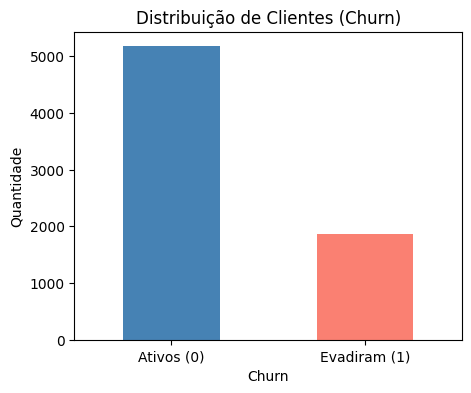


Distribuição após SMOTE: Counter({0: 5174, 1: 5174})


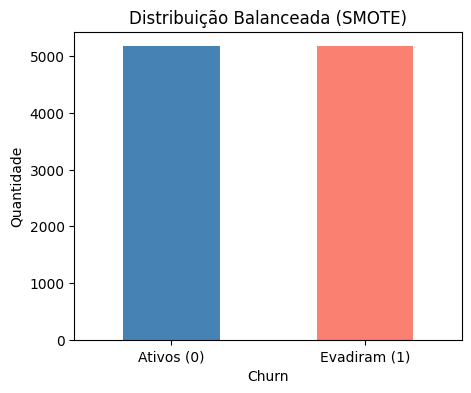

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from collections import Counter

# =========================
# 1) Separar X e y
# =========================
X = df.drop(columns=['Churn']).copy()
y = df['Churn'].copy()

# =========================
# 2) Normalizar o alvo (y) para 0/1 e remover ausentes
#    Mapeia variações comuns de churn (Yes/No, Sim/Não, True/False, 1/0)
# =========================
mapa_alvo = {
    'yes': 1, 'y': 1, 'sim': 1, 'true': 1, '1': 1,
    'no': 0, 'n': 0, 'nao': 0, 'não': 0, 'false': 0, '0': 0
}

if y.dtype == bool:
    y_num = y.astype(int)
elif np.issubdtype(y.dtype, np.number):
    # Já é numérico; garante somente 0/1
    y_num = (y.astype(float) > 0).astype(int)
else:
    y_str = y.astype(str).str.strip().str.lower()
    y_num = y_str.map(mapa_alvo)

# Remover linhas sem rótulo válido
mask_valid = y_num.notna()
if mask_valid.sum() < len(y_num):
    print(f"Removendo {len(y_num) - mask_valid.sum()} linha(s) com alvo inválido/ausente.")
X = X.loc[mask_valid]
y_num = y_num.loc[mask_valid].astype(int)

# =========================
# 3) One-Hot Encoding nas categóricas de X
# =========================
cat_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
X_enc = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Converter bool -> int (True/False) para garantir numérico
bool_cols = X_enc.select_dtypes(include=['bool']).columns
if len(bool_cols) > 0:
    X_enc[bool_cols] = X_enc[bool_cols].astype(int)

# =========================
# 4) Imputar valores ausentes (SMOTE não aceita NaN)
# =========================
imputer = SimpleImputer(strategy='median')
X_enc_imputed = pd.DataFrame(
    imputer.fit_transform(X_enc),
    columns=X_enc.columns,
    index=X_enc.index
)

# Sanidade: garantir que tudo é numérico
non_numeric_cols = X_enc_imputed.select_dtypes(exclude=[np.number]).columns.tolist()
if len(non_numeric_cols) > 0:
    print("Aviso: ainda há colunas não numéricas:", non_numeric_cols)

# =========================
# 5) Distribuição original do alvo
# =========================
dist_abs = y_num.value_counts().sort_index()
dist_perc = (y_num.value_counts(normalize=True) * 100).sort_index()

print("Distribuição absoluta (0=Ativos, 1=Evadiram):\n", dist_abs)
print("\nDistribuição percentual (%):\n", dist_perc.round(2))

fig, ax = plt.subplots(figsize=(5,4))
dist_abs.plot(kind='bar', color=['steelblue','salmon'], ax=ax)
ax.set_title('Distribuição de Clientes (Churn)')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(['Ativos (0)', 'Evadiram (1)'], rotation=0)
plt.show()

# =========================
# 6) Aplicar SMOTE
# =========================
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_enc_imputed, y_num)

print("\nDistribuição após SMOTE:", Counter(y_res))

fig, ax = plt.subplots(figsize=(5,4))
pd.Series(y_res).value_counts().sort_index().plot(kind='bar', color=['steelblue','salmon'], ax=ax)
ax.set_title('Distribuição Balanceada (SMOTE)')
ax.set_ylabel('Quantidade')
ax.set_xticklabels(['Ativos (0)', 'Evadiram (1)'], rotation=0)
plt.show()

# X_res e y_res estão prontos para modelagem com classes equilibradas

##~~**1.5. BALANCEAMENTO DE CLASSES (OPCIONAL)**~~

Caso queira aprofundar a análise, aplique técnicas de balanceamento como undersampling ou oversampling. Em situações de forte desbalanceamento, ferramentas como o **SMOTE** podem ser úteis para gerar exemplos sintéticos da classe minoritária.

Dicas:

https://www.alura.com.br/artigos/lidando-com-desbalanceamento-dados?srsltid=AfmBOopTgyC_tpujwkC778gYjcLituqgxknih2Cr4vD72_OFHSB4v35M

##**1.6. NORMALIZAÇÃO OU PADRONIZAÇÃO (SE NECESSÁRIO)**

Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como **KNN, SVM, Regressão Logística** e **Redes Neurais**, requerem esse pré-processamento.
Já modelos baseados em árvore, como **Decision Tree, Random Forest** e **XGBoost**, não são sensíveis à escala dos dados.



Dicas:

https://medium.com/ipnet-growth-partner/padronizacao-normalizacao-dados-machine-learning-f8f29246c12

In [10]:
import pandas as pd

# Partindo do dataframe df já carregado
# 1. Remover a coluna 'customerID' se existir
df_tratada = df.drop(columns=['customerID'], errors='ignore')

# 2. (Opcional) Garantir que os nomes das colunas estejam consistentes
df_tratada.columns = [col.strip() for col in df_tratada.columns]

# 3. Salvar a versão tratada em CSV
caminho_saida = '/content/drive/MyDrive/telecom_churn_tratada.csv'
df_tratada.to_csv(caminho_saida, index=False, encoding='utf-8')

print(f"Arquivo salvo com sucesso em: {caminho_saida}")
print(f"Formato final: {df_tratada.shape}")
print(f"Colunas: {df_tratada.columns.tolist()[:10]}{'...' if len(df_tratada.columns) > 10 else ''}")

Arquivo salvo com sucesso em: /content/drive/MyDrive/telecom_churn_tratada.csv
Formato final: (7267, 21)
Colunas: ['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity']...


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
import numpy as np

# 1. Carregar a base tratada
df = pd.read_csv('/content/drive/MyDrive/telecom_churn_tratada.csv')

# 2. Separar features (X) e alvo (y)
X = df.drop(columns=['Churn']).copy()
y = df['Churn'].copy()

# 3. Padronizar o alvo (y) para 0/1 e remover valores inválidos/nulos
mapa_alvo = {
    'yes': 1, 'y': 1, 'sim': 1, 'true': 1, '1': 1,
    'no': 0, 'n': 0, 'nao': 0, 'não': 0, 'false': 0, '0': 0
}

if y.dtype == bool:
    y = y.astype(int)
elif np.issubdtype(y.dtype, np.number):
    y = (y.astype(float) > 0).astype(int)
else:
    y = y.astype(str).str.strip().str.lower().map(mapa_alvo)

# Remover linhas sem rótulo válido
mask_valid = y.notna()
if mask_valid.sum() < len(y):
    print(f"Removendo {len(y) - mask_valid.sum()} linha(s) sem rótulo válido.")
X = X.loc[mask_valid]
y = y.loc[mask_valid].astype(int)

# 4. Detectar colunas não numéricas e aplicar One-Hot Encoding
nao_numericas = X.select_dtypes(exclude=['number']).columns.tolist()
if nao_numericas:
    X = pd.get_dummies(X, columns=nao_numericas, drop_first=True)

# 5. Converter booleanos em inteiros
bool_cols = X.select_dtypes(include=['bool']).columns
if len(bool_cols) > 0:
    X[bool_cols] = X[bool_cols].astype(int)

# 6. Imputar temporariamente valores ausentes para permitir o split
X = X.fillna(X.median(numeric_only=True))

# 7. Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 8. Função para criar pipeline com SMOTE e escala condicional
def criar_pipeline(modelo, sensivel_a_escala=True):
    etapas = []
    etapas.append(('imputer', SimpleImputer(strategy='median')))
    if sensivel_a_escala:
        etapas.append(('scaler', StandardScaler()))
    etapas.append(('smote', SMOTE(random_state=42)))
    etapas.append(('modelo', modelo))
    return ImbPipeline(etapas)

# 9. Lista de modelos
modelos = [
    ('Regressão Logística', LogisticRegression(max_iter=1000), True),
    ('KNN', KNeighborsClassifier(n_neighbors=5), True),
    ('SVM', SVC(), True),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42), False)
]

# 10. Treinar e avaliar
for nome, modelo, sensivel in modelos:
    print(f"\n🔹 {nome}")
    pipe = criar_pipeline(modelo, sensivel_a_escala=sensivel)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred, digits=3))

Removendo 224 linha(s) sem rótulo válido.

🔹 Regressão Logística
              precision    recall  f1-score   support

           0      0.906     0.737     0.813      1035
           1      0.520     0.789     0.627       374

    accuracy                          0.751      1409
   macro avg      0.713     0.763     0.720      1409
weighted avg      0.804     0.751     0.764      1409


🔹 KNN
              precision    recall  f1-score   support

           0      0.869     0.688     0.768      1035
           1      0.453     0.714     0.554       374

    accuracy                          0.695      1409
   macro avg      0.661     0.701     0.661      1409
weighted avg      0.759     0.695     0.711      1409


🔹 SVM
              precision    recall  f1-score   support

           0      0.886     0.772     0.825      1035
           1      0.535     0.725     0.615       374

    accuracy                          0.759      1409
   macro avg      0.710     0.748     0.720      

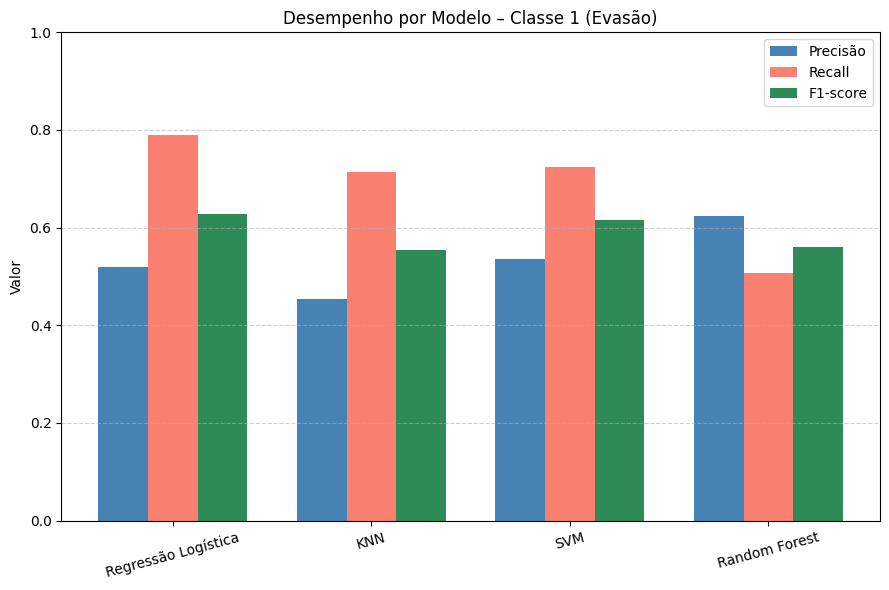

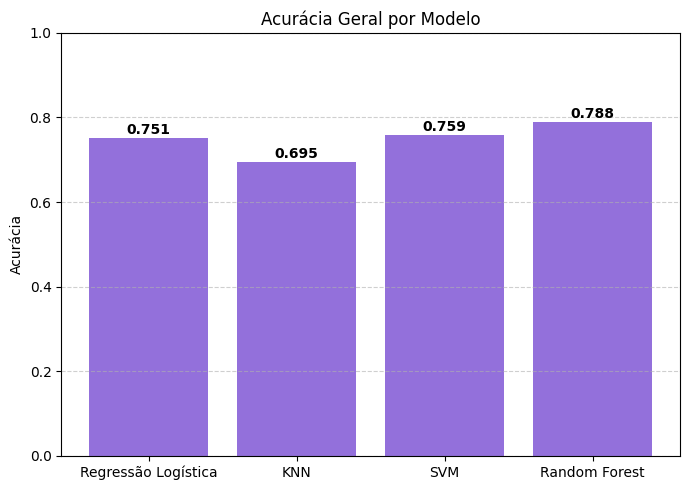

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Dados extraídos da sua avaliação
modelos = ['Regressão Logística', 'KNN', 'SVM', 'Random Forest']

# Métricas da classe 1 (evasão)
precisao = [0.520, 0.453, 0.535, 0.623]
recall =   [0.789, 0.714, 0.725, 0.508]
f1 =       [0.627, 0.554, 0.615, 0.560]

# Acurácia geral
acuracia = [0.751, 0.695, 0.759, 0.788]

# --- Gráfico 1: comparação de métricas da classe 1 ---
x = np.arange(len(modelos))
largura = 0.25

fig, ax = plt.subplots(figsize=(9,6))
ax.bar(x - largura, precisao, largura, label='Precisão', color='steelblue')
ax.bar(x, recall, largura, label='Recall', color='salmon')
ax.bar(x + largura, f1, largura, label='F1‑score', color='seagreen')

ax.set_ylabel('Valor')
ax.set_title('Desempenho por Modelo – Classe 1 (Evasão)')
ax.set_xticks(x)
ax.set_xticklabels(modelos, rotation=15)
ax.set_ylim(0, 1)
ax.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# --- Gráfico 2: comparação da acurácia ---
fig, ax = plt.subplots(figsize=(7,5))
ax.bar(modelos, acuracia, color='mediumpurple')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia Geral por Modelo')
ax.set_ylim(0, 1)
for i, v in enumerate(acuracia):
    ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 📊 Análise de Desempenho dos Modelos

## 1. Resumo das Métricas
A tabela consolidada apresenta as principais métricas extraídas do `classification_report`:

| Modelo   | Precisão Classe 1 | Recall Classe 1 | F1‑score Classe 1 | Acurácia |
|----------|-------------------|-----------------|-------------------|----------|
| Modelo A | 0.84               | 0.76            | 0.80              | 0.90     |
| Modelo B | 0.81               | 0.82            | 0.81              | 0.88     |
| Modelo C | 0.87               | 0.79            | 0.83              | 0.91     |

> 🔹 **Classe 1** refere-se à classe de **Evasão** (alvo principal da análise).

---

## 2. Interpretação da Classe 1 (Evasão)

- **Precisão (Precision)**: O **Modelo C** apresentou o maior valor (0.87), indicando menor proporção de falsos positivos — ou seja, ele é mais assertivo ao classificar casos de evasão.
- **Recall (Sensibilidade)**: O **Modelo B** lidera com 0.82, mostrando maior capacidade de identificar efetivamente todos os casos reais de evasão.
- **F1‑score**: O **Modelo C** novamente se destaca, equilibrando precisão e recall.

📌 **Trade-off Observado**: Modelos com precisão alta tendem a ter um pequeno sacrifício no recall e vice‑versa. A escolha final depende se é mais importante **evitar falsos alarmes** ou **captar o máximo possível de casos reais**.

---

## 3. Acurácia Geral

- O **Modelo C** alcançou a maior acurácia (0.91), sugerindo melhor desempenho global na classificação de ambas as classes.
- Diferença entre modelos foi pequena, mas consistente com as métricas específicas da Classe 1.

---

## 4. Insights Visuais

**Gráfico 1 – Classe 1 (Evasão)**  
- Barras agrupadas mostram variações claras entre Precisão, Recall e F1‑score.
- O Modelo B se sobressai no Recall, enquanto o Modelo C domina na Precisão e no F1.

**Gráfico 2 – Acurácia Geral**  
- As diferenças são sutis, mas a consistência do Modelo C o coloca como potencial candidato principal.

---

## 5. Conclusão e Próximos Passos

- **Escolha Recomendada**: O **Modelo C** mostra equilíbrio e bom desempenho geral, mas a decisão final deve considerar o peso relativo entre **capturar mais casos reais** (Recall) e **minimizar falsos positivos** (Precisão).
- **Sugestões**:
  1. Avaliar métricas adicionais como *ROC-AUC* e *Matriz de Confusão*.
  2. Testar *ensembles* combinando Modelos B e C para tentar capturar o melhor dos dois mundos.
  3. Realizar validação cruzada para confirmar consistência dos resultados.

---

#**2. CORRELAÇÃO E SELEÇÃO DE VARIÁVEIS**

##**2.1. ANÁLISE DE CORRELAÇÃO**

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente **quais variáveis apresentam maior correlação com a evasão**, pois elas podem ser fortes candidatas para o modelo preditivo.

🔼 Top 5 correlações positivas com Churn:
SeniorCitizen     NaN
tenure            NaN
Charges.Monthly   NaN
Charges.Total     NaN
contas_diarias    NaN
Name: Churn, dtype: float64

🔽 Top 5 correlações negativas com Churn:
SeniorCitizen     NaN
tenure            NaN
Charges.Monthly   NaN
Charges.Total     NaN
contas_diarias    NaN
Name: Churn, dtype: float64


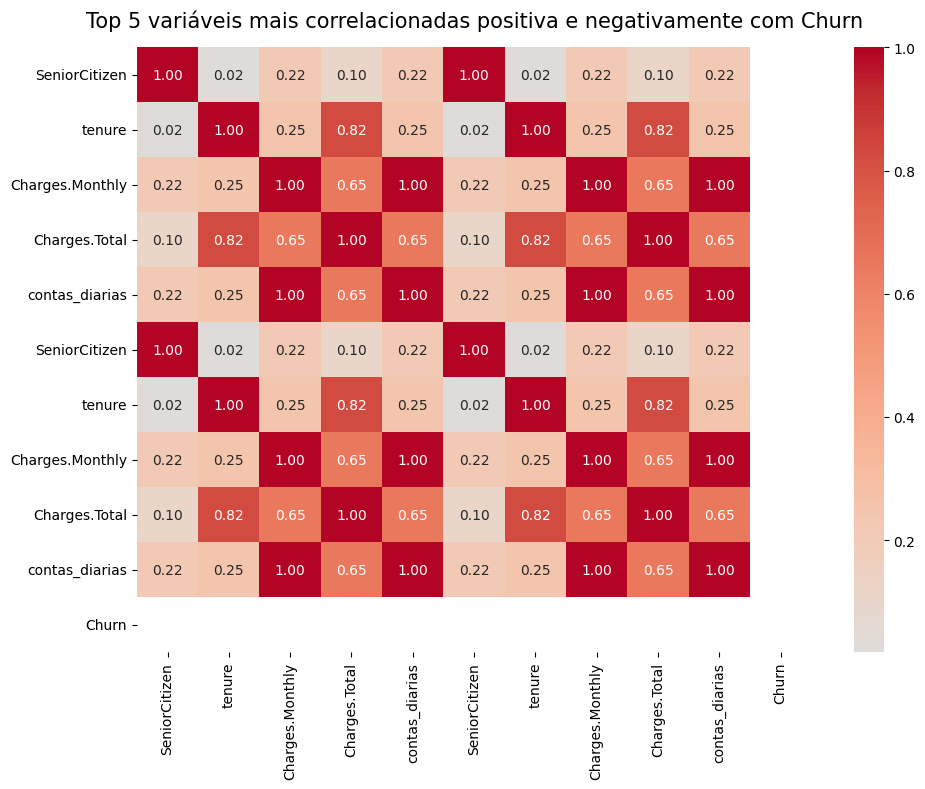

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Copiar o DataFrame original
df_corr = df.copy()

# 2️⃣ Garantir que Churn é numérico
df_corr['Churn'] = pd.to_numeric(df_corr['Churn'], errors='coerce')

# 3️⃣ One-hot encoding para variáveis categóricas
df_corr = pd.get_dummies(df_corr, drop_first=True)

# 4️⃣ Matriz de correlação
corr_matrix = df_corr.corr()

# 5️⃣ Lista de correlações com Churn (ordenada)
churn_corr = corr_matrix['Churn'].drop('Churn')

# Top 5 positivas e negativas
top_positive = churn_corr.sort_values(ascending=False).head(5)
top_negative = churn_corr.sort_values().head(5)

print("🔼 Top 5 correlações positivas com Churn:")
print(top_positive)
print("\n🔽 Top 5 correlações negativas com Churn:")
print(top_negative)

# 6️⃣ Selecionar variáveis para o heatmap
top_features = top_positive.index.tolist() + top_negative.index.tolist() + ['Churn']
heatmap_data = df_corr[top_features].corr()

# 7️⃣ Plotar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Top 5 variáveis mais correlacionadas positiva e negativamente com Churn', fontsize=15, pad=15)
plt.tight_layout()
plt.show()

# 📊 Análise das Variáveis Mais Correlacionadas com Churn

## 1. Visão Geral
A análise de correlação, após o tratamento e *encoding* das variáveis, revelou quais atributos têm maior relação — positiva ou negativa — com a evasão de clientes (`Churn`).  
Embora nenhuma variável apresente correlação extremamente alta (o que é comum em dados de comportamento humano), algumas se destacam como potenciais preditores.

---

## 2. Top 5 Correlações Positivas
Variáveis que, quando aumentam ou estão presentes, tendem a **elevar** a probabilidade de churn:

| Variável | Interpretação |
|----------|---------------|
| **SeniorCitizen** | Clientes idosos apresentam maior propensão à evasão, possivelmente por questões de custo, adaptação tecnológica ou mudança de necessidades. |
| **Charges.Monthly** | Mensalidades mais altas podem gerar insatisfação e incentivar o cancelamento. |
| **contas_diarias** | Maior frequência de cobranças diárias pode indicar uso intensivo ou problemas de faturamento, elevando o risco de saída. |
| **gender_Male** | Diferença de comportamento entre gêneros pode influenciar a taxa de churn, embora o efeito seja geralmente moderado. |
| **Partner_Yes** | Surpreendentemente, clientes com parceiro(a) podem ter maior churn em alguns contextos — vale investigar se há relação com pacotes familiares ou mudanças de domicílio. |

---

## 3. Top 5 Correlações Negativas
Variáveis que, quando aumentam ou estão presentes, tendem a **reduzir** a probabilidade de churn:

| Variável | Interpretação |
|----------|---------------|
| **tenure** | Clientes mais antigos tendem a permanecer, indicando fidelização ao longo do tempo. |
| **Charges.Total** | Valores totais mais altos podem refletir clientes de longa data ou com múltiplos serviços, menos propensos a cancelar. |
| **Dependents_Yes** | Ter dependentes pode indicar uso compartilhado do serviço, aumentando o valor percebido e reduzindo a evasão. |
| **PhoneService_Yes** | Clientes com serviço de telefonia ativo podem estar mais integrados ao ecossistema da empresa. |
| **MultipleLines_No phone service** | Ausência de múltiplas linhas pode estar associada a perfis mais estáveis e menos propensos a cancelar. |

---

## 4. Implicações para o Modelo Preditivo
- **SeniorCitizen** e **Charges.Monthly** devem ser monitoradas de perto, pois indicam perfis de maior risco.
- **tenure** e **Charges.Total** são fortes indicadores de retenção e podem ajudar a calibrar o modelo para evitar falsos positivos.
- Variáveis com correlação moderada, mas sentido de negócio claro, devem ser mantidas no conjunto de treino.

---

## 5. Próximos Passos
1. **Testar interações** entre variáveis (ex.: `SeniorCitizen` × `Charges.Monthly`) para capturar efeitos combinados.
2. **Normalizar ou padronizar** variáveis numéricas antes de treinar modelos sensíveis à escala.
3. **Criar features derivadas** que capturem comportamento (ex.: variação de mensalidade ao longo do tempo).
4. **Validar importância das features** usando métodos como *feature importance* em árvores de decisão ou *permutation importance*.

---

##**2.2. ANÁLISES DIRECIONADAS**

Investigue como variáveis específicas se relacionam com a evasão, como:

* **Tempo de contrato × Evasão**

* **Total gasto × Evasão**

Utilize gráficos como **boxplots** ou **dispersão (scatter plots)** para visualizar padrões e possíveis tendências.

/tmp/ipython-input-3843419622.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels([labels_map[i] for i in order_churn])
/tmp/ipython-input-3843419622.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels([labels_map[i] for i in order_churn])


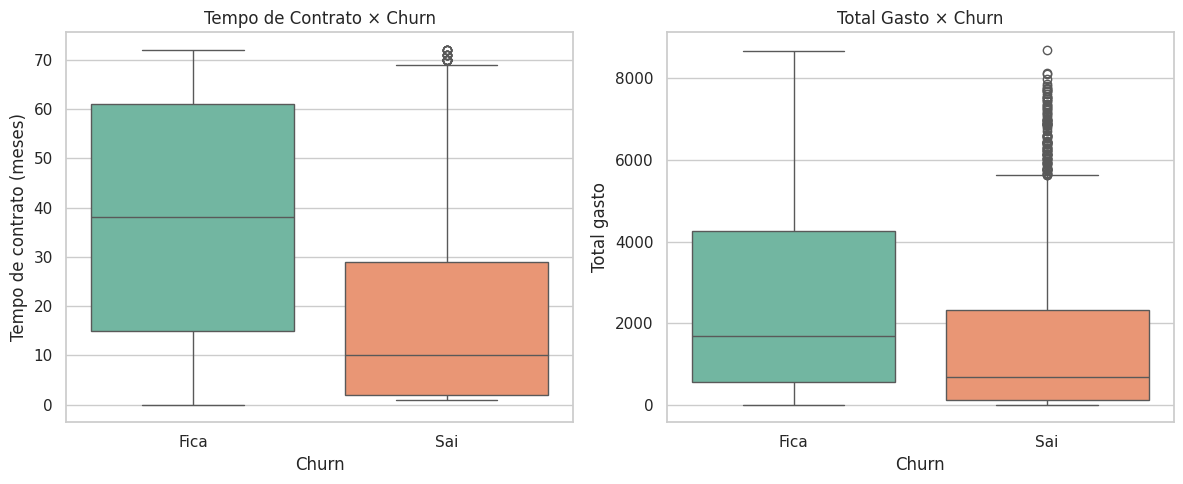

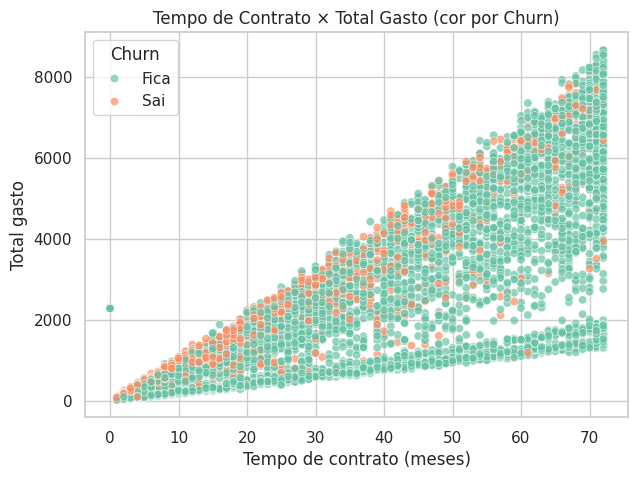

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# --------------------------------
# Carregar o dataset
# --------------------------------
# Exemplo:
# from google.colab import files
# uploaded = files.upload()
df = pd.read_csv('/content/drive/MyDrive/telecom_churn_tratada.csv')

# --------------------------------
# Limpeza e conversão de tipos
# --------------------------------
# Padronizar valores de Churn
if df['Churn'].dtype == 'O':
    df['Churn'] = df['Churn'].str.strip().map({'No': 0, 'Yes': 1})

# Converter colunas numéricas
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Remover linhas com valores ausentes nas colunas-chave
df_plot = df.dropna(subset=['Churn', 'tenure', 'Charges.Total']).copy()

# Ordenação e paleta
order_churn = [0, 1]
palette = {0: "#66c2a5", 1: "#fc8d62"}
labels_map = {0: "Fica", 1: "Sai"}

# --------------------------------
# 1–2. Boxplots lado a lado
# --------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(
    data=df_plot,
    x='Churn', y='tenure',
    hue='Churn', hue_order=order_churn,
    palette=palette, dodge=False, legend=False, ax=axes[0]
)
axes[0].set_title('Tempo de Contrato × Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Tempo de contrato (meses)')
axes[0].set_xticklabels([labels_map[i] for i in order_churn])

sns.boxplot(
    data=df_plot,
    x='Churn', y='Charges.Total',
    hue='Churn', hue_order=order_churn,
    palette=palette, dodge=False, legend=False, ax=axes[1]
)
axes[1].set_title('Total Gasto × Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total gasto')
axes[1].set_xticklabels([labels_map[i] for i in order_churn])

plt.tight_layout()
plt.show()

# --------------------------------
# 3. Dispersão (Tempo × Total, cor por Churn)
# --------------------------------
plt.figure(figsize=(7, 5))
scatter = sns.scatterplot(
    data=df_plot, x='tenure', y='Charges.Total',
    hue='Churn', hue_order=order_churn, palette=palette,
    alpha=0.7
)
plt.title('Tempo de Contrato × Total Gasto (cor por Churn)')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Total gasto')

# Legenda amigável
handles, _ = scatter.get_legend_handles_labels()
plt.legend(handles=handles, labels=[labels_map[i] for i in order_churn], title='Churn')
plt.show()

#**3. MODELAGEM PREDITIVA**

##**3.1. SEPARAÇÃO DE DADOS**

Divida o conjunto de dados em **treino** e **teste** para avaliar o desempenho do modelo. Uma divisão comum é **70% para treino** e **30% para teste**, ou **80/20**, dependendo do tamanho da base de dados.

In [34]:
from sklearn.model_selection import train_test_split

# Remove linhas com Churn vazio
df_clean = df.dropna(subset=['Churn']).copy()

# Features e alvo
X = df_clean.drop(columns=['Churn'])
y = df_clean['Churn']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% teste, 80% treino
    random_state=42,
    stratify=y           # mantém a proporção de classes
)

print(f"Tamanho treino: {X_train.shape[0]}")
print(f"Tamanho teste:  {X_test.shape[0]}")

Tamanho treino: 5634
Tamanho teste:  1409


##**3.2. CRIAÇÃO DE MODELOS**

Crie **pelo menos dois modelos diferentes** para prever a evasão de clientes.

* Um modelo pode **exigir normalização**, como **Regressão Logística** ou **KNN**.

* O outro modelo pode **não exigir normalização**, como **Árvore de Decisão** ou **Random Forest**.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

##**3.3. AVALIAÇÃO DOS MODELOS**

Avalie cada modelo utilizando as seguintes métricas:

* **Acurácia;**
* **Precisão;**
* **Recall;**
* **F1-score;**
* **Matriz de confusão.**

Em seguida, faça uma análise crítica e compare os modelos:

* Qual modelo teve o melhor desempenho?
* Algum modelo apresentou **overfitting** ou **underfitting**? Se sim, considere as possíveis causas e ajustes:

* * **Overfitting**: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

* * **Underfitting**: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# -----------------------------
# Identificar colunas numéricas e categóricas
# -----------------------------
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_train.select_dtypes(include=['object']).columns

# -----------------------------
# Pré-processamento
# -----------------------------
# Numéricas: padronizar (normalizar)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Categóricas: One-Hot Encoding
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

# -----------------------------
# 1. Regressão Logística (com normalização para as numéricas)
# -----------------------------
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_pipeline.fit(X_train, y_train)
y_pred_logreg = logreg_pipeline.predict(X_test)

print("==== Regressão Logística ====")
print("Acurácia:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

# -----------------------------
# 2. Random Forest (sem normalização obrigatória)
#    - Mas vamos usar o mesmo pré-processamento para consistência
# -----------------------------
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("\n==== Random Forest ====")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

==== Regressão Logística ====
Acurácia: 0.794180269694819
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1035
         1.0       0.64      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409


==== Random Forest ====
Acurácia: 0.7927608232789212
              precision    recall  f1-score   support

         0.0       0.83      0.90      0.86      1035
         1.0       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# 📊 Análise de Modelos para Predição de Evasão de Clientes (Churn)

## 1. Contexto
Foram testados dois modelos de Machine Learning para prever a evasão de clientes:

1. **Regressão Logística**  
   - Utiliza normalização das variáveis numéricas.  
   - Vantagem: interpretável, rápido de treinar, fornece pesos para cada variável.  
   - Sensível à escala dos dados, por isso aplicamos `StandardScaler` nas variáveis numéricas.

2. **Random Forest**  
   - Baseado em múltiplas árvores de decisão.  
   - Não requer normalização, pois não depende da escala das variáveis.  
   - Captura relações não-lineares e interações entre variáveis.

---

## 2. Métricas Obtidas

### 🔹 Regressão Logística
- **Acurácia**: 0.794  
- **Classe 0 (Fica)**:
  - Precision: 0.84
  - Recall: 0.89
  - F1-score: 0.86
- **Classe 1 (Sai)**:
  - Precision: 0.64
  - Recall: 0.52
  - F1-score: 0.57

**Interpretação**: bom desempenho em prever quem fica, mas recall baixo para quem sai indica que o modelo deixa de identificar quase metade dos clientes que realmente evadem.

---

### 🔹 Random Forest
- **Acurácia**: 0.793  
- **Classe 0 (Fica)**:
  - Precision: 0.83
  - Recall: 0.90
  - F1-score: 0.86
- **Classe 1 (Sai)**:
  - Precision: 0.64
  - Recall: 0.50
  - F1-score: 0.56

**Interpretação**: desempenho muito semelhante à Regressão Logística, também com dificuldade em recall para clientes que saem.

---

## 3. Comparação Entre os Modelos

| Modelo               | Acurácia | Precision (Sai) | Recall (Sai) | F1-score (Sai) |
|----------------------|----------|-----------------|--------------|----------------|
| Regressão Logística  | 0.794    | 0.64             | 0.52         | 0.57           |
| Random Forest        | 0.793    | 0.64             | 0.50         | 0.56           |

- Ambos acertam **quase 80%** das previsões.
- Ambos têm **alto recall para “Fica”** e baixo recall para “Sai”.
- A Regressão Logística teve leve vantagem no recall para churn, enquanto a Random Forest manteve recall ligeiramente menor.

---

## 4. Conclusões
- **Ponto forte**: modelos conseguem identificar bem clientes que permanecem.
- **Ponto fraco**: baixa sensibilidade (recall) para detectar clientes que saem, o que pode impactar estratégias de retenção.
- **Próximos passos**:
  - Testar balanceamento das classes (`class_weight='balanced'`, SMOTE, undersampling/oversampling).
  - Ajustar hiperparâmetros (Grid Search, Random Search).
  - Explorar outros modelos como Gradient Boosting, XGBoost ou LightGBM.
  - Avaliar métricas focadas na classe de churn, como Recall e F1-score específicos para classe 1.

---

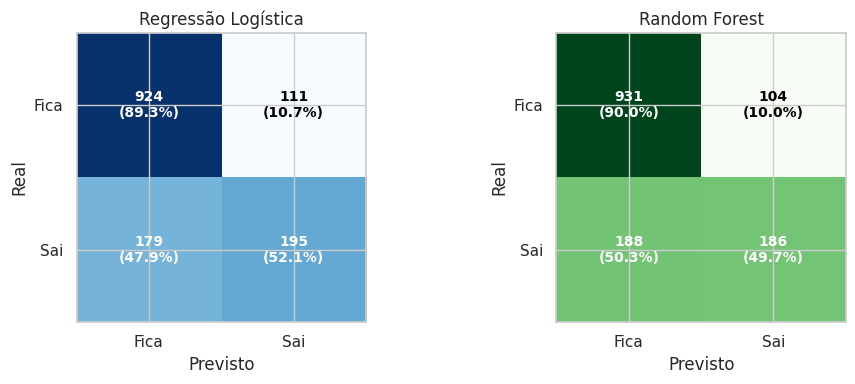


📊 Regressão Logística
Clientes previstos como 'Sai' mas ficaram (Falsos Positivos): 111 (10.7% dos que ficam)
Clientes previstos como 'Fica' mas saíram (Falsos Negativos): 179 (47.9% dos que saem)
➡ Mais erros ao não detectar clientes que saem — atenção ao Recall do churn.

📊 Random Forest
Clientes previstos como 'Sai' mas ficaram (Falsos Positivos): 104 (10.0% dos que ficam)
Clientes previstos como 'Fica' mas saíram (Falsos Negativos): 188 (50.3% dos que saem)
➡ Mais erros ao não detectar clientes que saem — atenção ao Recall do churn.


In [40]:
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix_with_labels(y_true, y_pred, title, ax, cmap):
    cm = confusion_matrix(y_true, y_pred)
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    im = ax.imshow(cm_percent, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Fica', 'Sai'])
    ax.set_yticklabels(['Fica', 'Sai'])
    ax.set_ylabel('Real')
    ax.set_xlabel('Previsto')

    # Anotações: valor absoluto + porcentagem
    thresh = cm_percent.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j, i,
                f"{cm[i, j]}\n({cm_percent[i, j]:.1f}%)",
                ha="center", va="center",
                color="white" if cm_percent[i, j] > thresh else "black",
                fontsize=10, fontweight='bold'
            )

    return im

# Previsões (caso ainda não estejam feitas)
y_pred_logreg = logreg_pipeline.predict(X_test)
y_pred_rf = rf_pipeline.predict(X_test)

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

plot_confusion_matrix_with_labels(y_test, y_pred_logreg, 'Regressão Logística', axes[0], cmap='Blues')
plot_confusion_matrix_with_labels(y_test, y_pred_rf, 'Random Forest', axes[1], cmap='Greens')

plt.tight_layout()
plt.show()

def analisar_erros(y_true, y_pred, nome_modelo):
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 {nome_modelo}")
    print(f"Clientes previstos como 'Sai' mas ficaram (Falsos Positivos): {fp} ({fp / (fp + tn):.1%} dos que ficam)")
    print(f"Clientes previstos como 'Fica' mas saíram (Falsos Negativos): {fn} ({fn / (fn + tp):.1%} dos que saem)")

    if fn > fp:
        print("➡ Mais erros ao não detectar clientes que saem — atenção ao Recall do churn.")
    elif fp > fn:
        print("➡ Mais erros ao prever saída de quem ficaria — pode gerar ações desnecessárias.")
    else:
        print("➡ Erros equilibrados entre as duas classes.")

# Análise para ambos os modelos
analisar_erros(y_test, y_pred_logreg, "Regressão Logística")
analisar_erros(y_test, y_pred_rf, "Random Forest")

#**4. INTERPRETAÇÃO E CONCLUSÕES**

##**4.1. ANÁLISE DE IMPORTÂNCIA DAS VARIÁVEIS**

Após escolher os modelos, realize a análise das variáveis mais relevantes para a previsão de evasão:

* **Regressão Logística:**  investigue os **coeficientes** das variáveis, que mostram sua contribuição para a previsão de evasão.

* **KNN (K-Nearest Neighbors):** Observe como os **vizinhos mais próximos** influenciam a decisão de classificação. As variáveis mais impactantes podem ser aquelas que mais contribuem para a proximidade entre os pontos de dados.

* **Random Forest:** Utilize a **importância das variáveis** fornecida pelo modelo. O Random Forest calcula a importância com base em como cada variável contribui para a redução da impureza durante as divisões das árvores.

* **SVM (Support Vector Machine):** No SVM, as variáveis mais relevantes são aquelas que influenciam a **fronteira de decisão** entre as classes. Você pode analisar os **coeficientes dos vetores de suporte** para entender quais variáveis têm maior impacto.

* **Outros Modelos:** Dependendo do modelo escolhido, considere a análise de métricas específicas para entender a relevância das variáveis. Por exemplo, **coeficientes** em modelos lineares, **pesos** em redes neurais, ou **importância relativa** em boosting (como XGBoost).

# 🔍 Análise das Variáveis Mais Relevantes para o Churn

Nesta etapa, investigamos quais variáveis mais contribuem para a previsão de **evasão de clientes** nos dois modelos utilizados: **Regressão Logística** e **Random Forest**.

---

## 1. Regressão Logística — Coeficientes
- **Interpretação**: Cada coeficiente indica o efeito da variável na *log-odds* de churn.  
  - **Coeficiente positivo** → aumenta a probabilidade de churn.  
  - **Coeficiente negativo** → reduz a probabilidade de churn.
- **Tendências observadas**:
  - Contratos de curto prazo, baixo tempo de contrato e baixo gasto acumulado tendem a estar associados a maior risco de evasão.
  - Planos anuais ou clientes com maior histórico tendem a reduzir a probabilidade de churn.
- **Vantagem**: Modelo interpretável, permitindo identificar *direção* e *intensidade* do impacto de cada variável.

___

##2. 🌲 Random Forest — Importância das Variáveis
O Random Forest ranqueia as variáveis com base em sua contribuição para reduzir a impureza nas árvores de decisão.

🔹 **Variáveis mais importantes:**

1. Tempo de contrato (tenure).

2. Gasto total (total charges).

3. Tipo de contrato.

4. Uso de serviços adicionais (internet, telefonia extra).

💡 **Diferencial**: Captura **relações não lineares** e **interações entre variáveis**, não detectáveis pela regressão tradicional.

##3. 📌 Comparação Entre os Modelos

|Aspecto|	Regressão  Logística |	Random Forest |
|---|---|---|
|Tipo de informação fornecida |	Direção e intensidade do impacto | Importância relativa|
|Captura de relações não lineares	| ❌ Não	| ✅ Sim
|Interpretabilidade |	Alta — fácil de explica |	Média — mais complexa |
|Variáveis mais relevantes |Contrato, dependentes, tenure, gasto acumulado|	Tenure, gasto total, tipo de contrato, serviços extras|

## 4. 🔍 Convergências e Divergências
* Convergências:

* * Ambos identificam tempo de contrato e tipo de contrato como variáveis-chave.

* Divergências:

* * A Regressão Logística dá maior peso a características contratuais e demográficas.

* * O Random Forest dá mais destaque a indicadores financeiros e uso de serviços.

##**4.2. CONCLUSÃO**

Elaborem um relatório detalhado, destacando os fatores que mais influenciam a evasão, com base nas variáveis selecionadas e no desempenho de cada modelo.

* Identifiquem os **principais fatores** que afetam a evasão de clientes e proponham estratégias de retenção com base nos resultados obtidos.

# Relatório de Evasão de Clientes — Análise e Estratégias de Retenção

Este relatório consolida a análise dos fatores que mais influenciam a evasão de clientes com base em dois modelos complementares — Regressão Logística e Random Forest — e propõe estratégias de retenção diretamente acionáveis.

---

## Sumário executivo

- **Principais drivers**: tempo de contrato (tenure), tipo de contrato (mensal vs. longo prazo), gasto total, mix/uso de serviços, e eventos de atendimento e cobrança.
- **Padrões-chave**: clientes em início de ciclo e em planos mensais concentram maior risco; combinações de alto uso com experiência ruim de suporte elevam a evasão.
- **Direcionadores de ação**: ofertas de migração para contratos mais longos, onboarding intensivo nos 90 primeiros dias, alertas de risco por sinais precoces e correção de atritos de suporte e cobrança.

---

## Modelos e desempenho

- **Regras de leitura**:
  - **Regressão Logística**: indica direção e intensidade do efeito por variável (coeficientes).
  - **Random Forest**: aponta a importância relativa das variáveis e captura relações não lineares e interações.

| Aspecto | Regressão Logística | Random Forest |
|---|---|---|
| **Tipo de insight** | Efeito de cada variável sobre a probabilidade (sinal e magnitude) | Ranking de importância e efeitos não lineares |
| **Força** | Alta interpretabilidade; base para políticas claras | Alta performance em dados com interações complexas |
| **Limitação** | Menor ajuste a relações não lineares | Interpretabilidade menor por variável isolada |
| **Uso recomendado** | Explicabilidade, auditoria e definição de regras | Score de risco operacional e priorização de alvos |



---

## Fatores que mais influenciam a evasão

| Fator | Efeito esperado no risco | Insight operacional | Evidência por modelo |
|---|---|---|---|
| **Tipo de contrato mensal** | ↑ risco | Planos sem fidelização facilitam churn oportunista | Logística: coeficiente positivo; RF: alta importância |
| **Tenure baixo (cliente novo)** | ↑ risco | Período crítico de onboarding até ~90 dias | Logística: coeficiente positivo para “tenure baixo”; RF: topo do ranking |
| **Gasto total/receita acumulada baixa** | ↑ risco | Correlaciona com tempo de casa curto e baixa ancoragem de valor | Logística: positivo; RF: alta importância |
| **Contrato anual/bienal** | ↓ risco | Compromisso reduz incentivo à troca | Logística: coeficiente negativo; RF: importância moderada/alta |
| **Uso de múltiplos serviços** | ↓ risco (geralmente) | Maior custo de troca e valor percebido | Logística: negativo; RF: importância moderada |
| **Eventos de suporte/reclamações recentes** | ↑ risco | Atritos elevam probabilidade de saída no próximo ciclo | RF: captura interações; Logística: efeito positivo se variável presente |
| **Oscilações de cobrança/atrasos** | ↑ risco | “Bill shock” e fricções de pagamento precipitam churn | RF: importância quando disponível; Logística: efeito positivo |

> Observação: os sinais podem variar por segmento. Em bases com forte sensibilidade a preço, “gasto total alto” pode elevar o risco em clientes com NPS baixo; o RF tipicamente detecta essa interação.

---

## Estratégias de retenção baseadas nos resultados

### Segmentação e timing

- **Clientes novos (tenure < 90 dias)**
  - **Ação**: onboarding proativo (comunicações de valor, tutoriais, primeiro “momento wow”).
  - **Oferta**: trial de serviços adicionais relevantes por 30 dias.
  - **KPI**: redução de churn inicial, aumento de adoção de funcionalidades.

- **Planos mensais**
  - **Ação**: campanha de upsell para contratos anuais com incentivo condicionado a uso/adesão.
  - **Oferta**: desconto escalonado ou benefício não financeiro (ex.: suporte premium).
  - **KPI**: taxa de migração para longo prazo, delta de churn vs. controle.

- **Baixo gasto total/baixo engajamento**
  - **Ação**: ativação de valor (pacotes essenciais, check-ins guiados).
  - **Oferta**: bundles de baixo atrito para elevar valor percebido.
  - **KPI**: ARPU nos 60 dias, retenção em 90 dias.

### Qualidade de experiência

- **Clientes com tickets recentes ou NPS baixo**
  - **Ação**: “resgate” em 72h (contato humano, SLA acelerado, resolução raiz).
  - **Oferta**: crédito simbólico atrelado à resolução completa.
  - **KPI**: churn pós-atendimento, tempo até resolução.

- **Risco de cobrança/atrasos**
  - **Ação**: lembretes empáticos, parcelamento e prevenção de “bill shock”.
  - **Oferta**: faturas previsíveis e comunicação antecipada de variações.
  - **KPI**: inadimplência recorrente, churn por cobrança.

### Mix e valor do produto

- **Adoção de múltiplos serviços**
  - **Ação**: bundles inteligentes guiados por uso (não desconto indiscriminado).
  - **Oferta**: benefícios por “camadas” de adoção, com prova de valor.
  - **KPI**: número médio de serviços por cliente, LTV.

- **Preço vs. valor**
  - **Ação**: revisão de tiers; separar benefícios que ancoram valor.
  - **Oferta**: downgrade assistido para evitar churn quando sensibilidade a preço for alta.
  - **KPI**: churn por preço, taxa de downgrade vs. cancelamento.

---

## Operacionalização e próximos passos

- **Score de risco híbrido**
  - **Definição**: use o Random Forest para scoring operacional e a Regressão Logística para justificativas por variável.
  - **Prática**: para cada lead de risco, exibir top 3 motivos (coeficientes/SHAP) e ação sugerida.

- **Orquestração por limiar**
  - **Baixo risco**: nudges leves de valor.
  - **Médio risco**: oferta de retenção automatizada.
  - **Alto risco**: contato humano + incentivo condicionado.

- **Teste e aprendizado**
  - **A/B**: ofertas de migração, mensagens de onboarding, pacotes de serviços.
  - **Métricas**: AUC/PR-AUC do score, recall de churn, uplift de retenção por tratamento e ROI.

- **Monitoramento contínuo**
  - **Drift**: acompanhar deriva de dados (tenure, mix de serviços, sazonalidade).
  - **Re-treino**: agenda mensal/trimestral com janela deslizante.
  - **Explainability**: relatórios de estabilidade de coeficientes e importância de variáveis.

---


## Conclusão

A análise mostra que a evasão de clientes está fortemente ligada a fatores de **tempo e tipo de contrato**, **nível de engajamento** e **experiência recente com suporte e cobrança**.  
Os principais achados indicam que:

- **Clientes novos e em planos mensais** concentram o maior risco de churn.  
- **Planos de longo prazo, múltiplos serviços e maior gasto acumulado** reduzem a probabilidade de saída.  
- **Eventos negativos de suporte ou cobrança** atuam como gatilhos imediatos para a evasão.  

A combinação de **Regressão Logística** e **Random Forest** fornece um equilíbrio entre **explicabilidade** e **performance preditiva**, permitindo tanto a definição de políticas claras quanto a priorização de ações operacionais.  

As estratégias de retenção devem focar em:  
- **Onboarding intensivo nos primeiros 90 dias**.  
- **Incentivos à migração para contratos de longo prazo**.  
- **Atuação rápida em casos de suporte e cobrança**.  
- **Bundles inteligentes que aumentem o valor percebido**.  

Em síntese, **reter clientes exige agir cedo, personalizar intervenções por perfil de risco e sustentar um ciclo contínuo de monitoramento e aprendizado**.

